### Importing packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Loading data

In [2]:
df = pd.read_csv('C:/Users/anahi/Downloads/weather-check.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


### Getting to know data 

In [200]:
df.columns

Index(['RespondentID', 'Do you typically check a daily weather report?',
       'How do you typically check the weather?',
       'A specific website or app (please provide the answer)',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',
       'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

In [201]:
df.isnull().sum()

RespondentID                                                                                                                                    0
Do you typically check a daily weather report?                                                                                                  0
How do you typically check the weather?                                                                                                         0
A specific website or app (please provide the answer)                                                                                           0
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?    0
Age                                                                                                                                             0
What is your gender?                                                                                                        

In [202]:
df['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].unique()

array(['Very likely', 'Somewhat likely', 'Very unlikely', '-',
       'Somewhat unlikely'], dtype=object)

In [203]:
df['Age'].unique()

array(['30 - 44', '18 - 29', '-', '45 - 59', '60+'], dtype=object)

In [204]:
df['US Region'].unique()

array(['South Atlantic', '-', 'Middle Atlantic', 'West South Central',
       'Pacific', 'West North Central', 'East North Central', 'Mountain',
       'New England', 'East South Central'], dtype=object)

In [205]:
df['How much total combined money did all members of your HOUSEHOLD earn last year?'].unique()

array(['$50,000 to $74,999', 'Prefer not to answer',
       '$100,000 to $124,999', '$150,000 to $174,999',
       '$25,000 to $49,999', '-', '$0 to $9,999', '$10,000 to $24,999',
       '$75,000 to $99,999', '$200,000 and up', '$175,000 to $199,999',
       '$125,000 to $149,999'], dtype=object)

## Chart 1.1 absolute values

My first plot focuses on absolute values for question (If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?) and age. I have "-" in my age data, indicating that there are participants under 18 who participated in the survey. However, I decided to drop them. Similarly, in my question responses, there is also a "-" which means that there are participants who did not answer the question, leading to blanks. I decided to drop these responses as well.

Please note that, even after droping these data points, my bar chart did not sum up to 100% anyway. Therefore, to enhance the visual appeal of the chart, I chose to drop them.

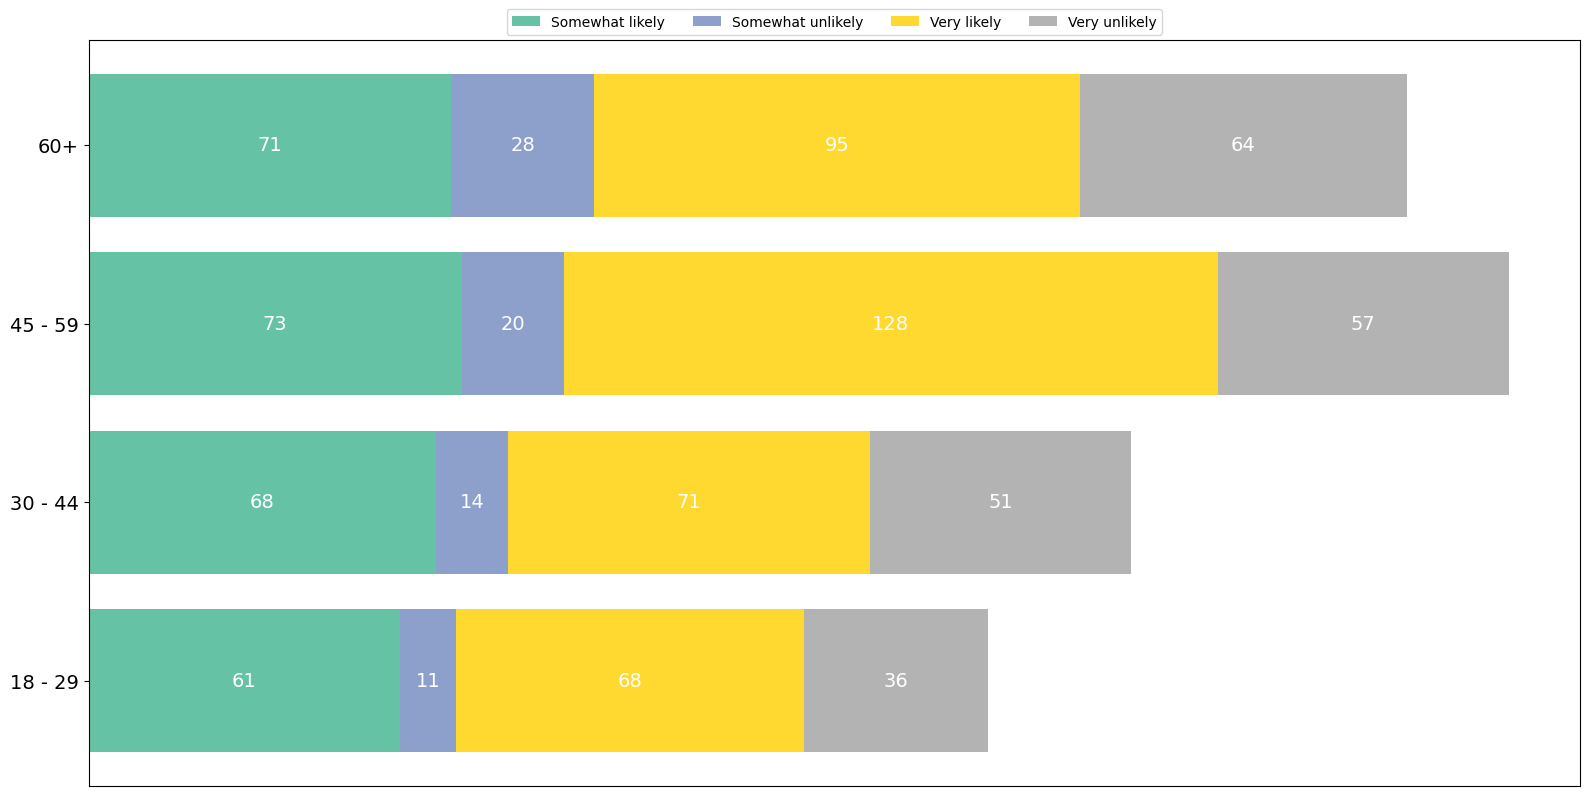

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#My variables for chart 1.1 are:
question_var = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
age_var = 'Age'

#Since it has '-' in both variables, I decided to drop them
df[age_var] = df[age_var].str.strip().replace('-', np.nan)
df[question_var] = df[question_var].str.strip().replace('-', np.nan)
df.dropna(subset=[age_var,question_var], inplace=True)

pivot_df = df.groupby([age_var, question_var]).size().unstack()


plt.figure(figsize=(16,8))
left = np.zeros(len(pivot_df))

#Coloring
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df.columns)))

for idx, answer in enumerate(pivot_df.columns):
    bars = plt.barh(pivot_df.index, pivot_df[answer], left=left, color=colors[idx], label=answer)
    left += pivot_df[answer]

    # Displaying counts on the bars
    for bar, count in zip(bars, pivot_df[answer]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{count}', ha='center', va='center', color='white',fontsize=14)

#Adding and removing some stuff 
plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#Moving legend outside the plot 
plt.legend({group: col for group, col in zip(pivot_df.columns, colors)}, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(pivot_df.columns))

plt.tight_layout()
plt.show()

## Chart 1.2 absolute values

I followed the same approach for my question and the US region, and the results can be seen below. Additionally, I included comments throughout my code to provide clarity on the steps taken.While my code allows for creating this plot with different variables each time by changing the second variable, for my absolute values plot assignment, I chose to focus on these two. If you wish to explore further, feel free to modify the second variable.

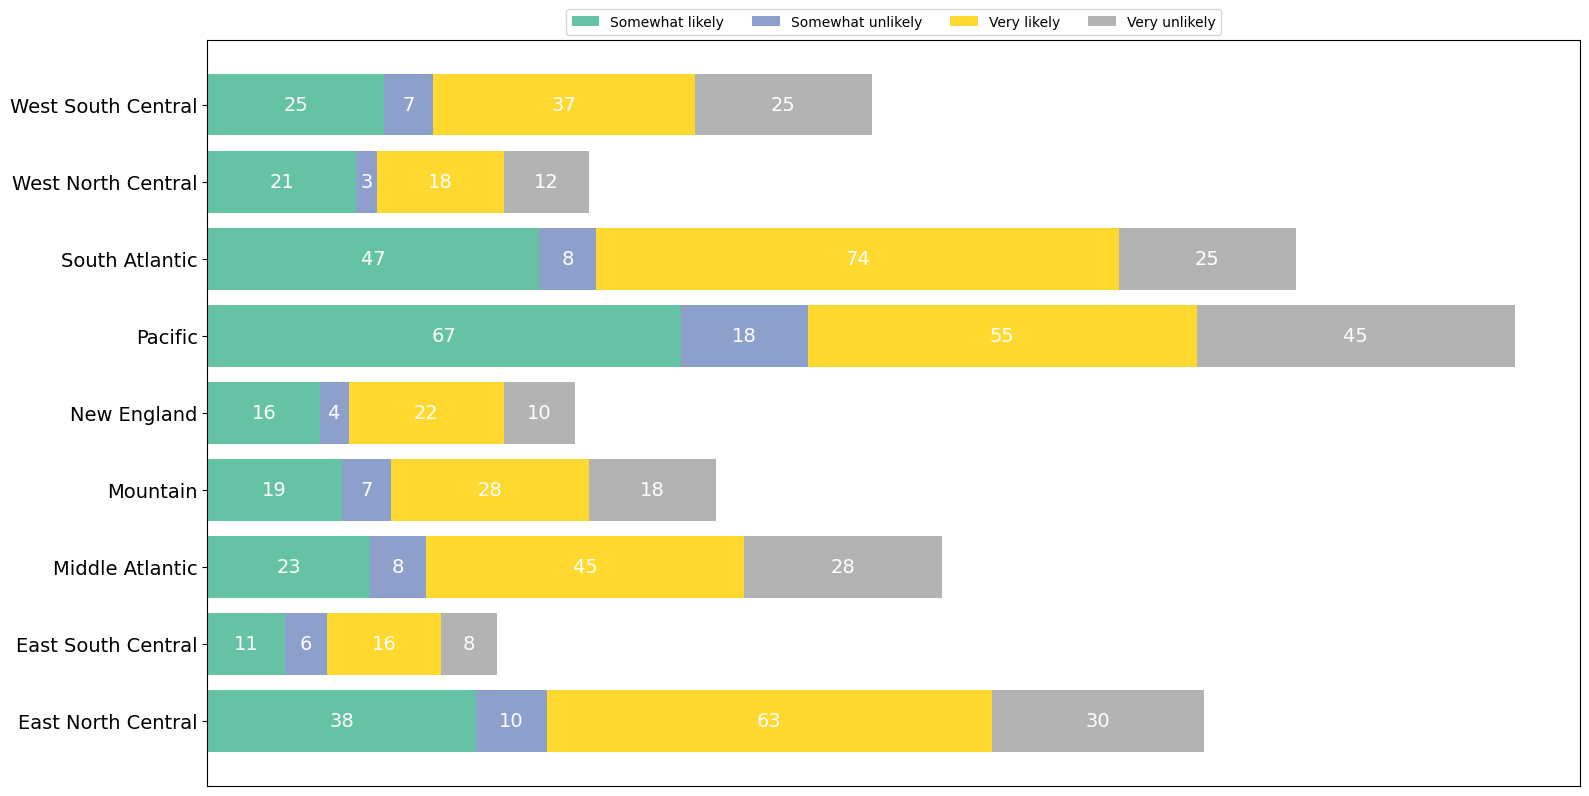

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#My variables for chart 1.2 are:
question_var = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
region_var = 'US Region'

#Since it has '-' in both variables, I decided to drop them
df[region_var] = df[region_var].str.strip().replace('-', np.nan)
df[question_var] = df[question_var].str.strip().replace('-', np.nan)
df.dropna(subset=[region_var, question_var], inplace=True)

pivot_df = df.groupby([region_var, question_var]).size().unstack().fillna(0)


plt.figure(figsize=(16,8), dpi=100)
left = np.zeros(len(pivot_df))

#Coloring
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df.columns)))

for idx, answer in enumerate(pivot_df.columns):
    bars = plt.barh(pivot_df.index, pivot_df[answer], left=left, color=colors[idx], label=answer)
    left += pivot_df[answer]

    # Displaying counts on the bars
    for bar, count in zip(bars, pivot_df[answer]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{count}', ha='center', va='center', color='white',fontsize=14)

#Adding and removing some stuff 
plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#Moving legend outside the plot 
plt.legend({group: col for group, col in zip(pivot_df.columns, colors)}, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(pivot_df.columns))

plt.tight_layout()
plt.show()

# Chart 2.1 sum up to 100

As you can notice, this is the same plot as before (1.1), but with normalized data. The normalization ensures that all bars are equal in length, although the values do not sum up to 100.

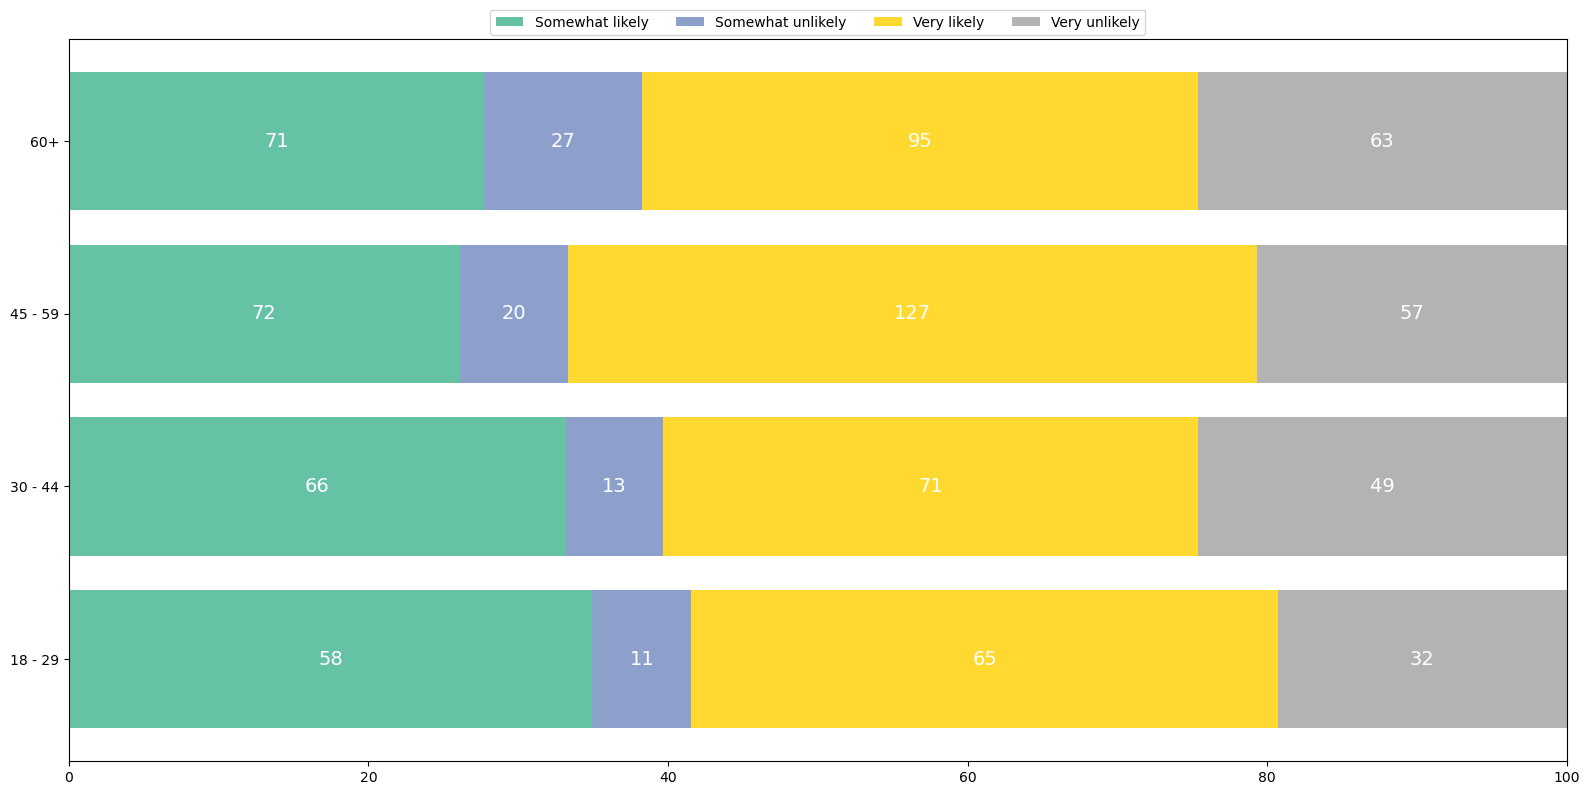

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# My variables for chart 2.1 are:
question_var = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
age_var = 'Age'

# Since it has '-' in both variables, I decided to drop them
df[age_var] = df[age_var].str.strip().replace('-', np.nan)
df[question_var] = df[question_var].str.strip().replace('-', np.nan)
df.dropna(subset=[age_var, question_var], inplace=True)

pivot_df = df.groupby([age_var, question_var]).size().unstack()

# Normalize the data
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 8))
left = np.zeros(len(pivot_df_percentage))

# Coloring
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df_percentage.columns)))

for idx, answer in enumerate(pivot_df_percentage.columns):
    bars = plt.barh(pivot_df_percentage.index, pivot_df_percentage[answer], left=left, color=colors[idx], label=answer)
    left += pivot_df_percentage[answer]

    
    # Displaying counts on the bars
    for bar, count in zip(bars, pivot_df[answer]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{count}', ha='center', va='center', color='white',fontsize=14)

#Setting x-axis limit to 100%
plt.xlim(0, 100)

plt.legend({group: col for group, col in zip(pivot_df_percentage.columns, colors)}, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(pivot_df_percentage.columns))

plt.tight_layout()
plt.show()


# Final chart 

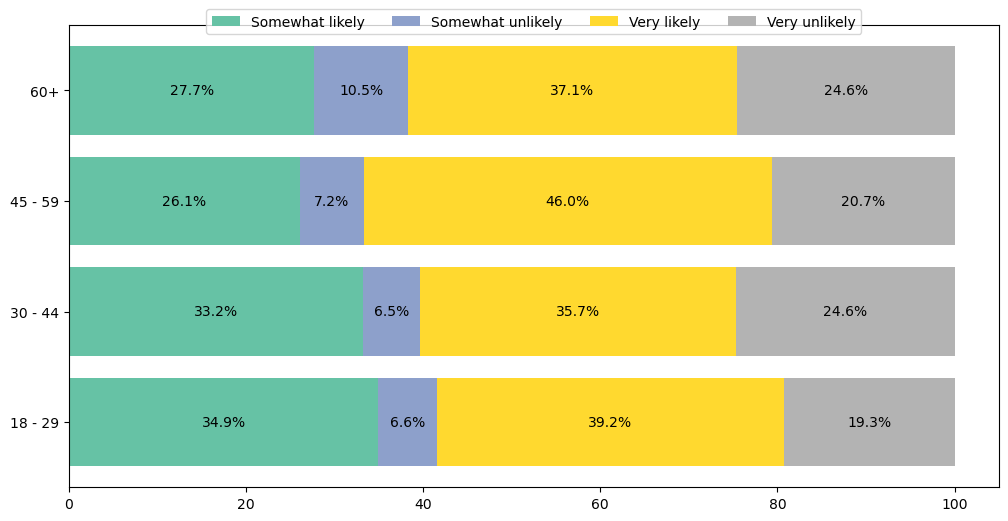

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pivot_df = df.groupby(age_var)['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts(normalize=True).unstack().fillna(0) * 100

#Coloring
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df.columns)))

#Creating a figure and axis for my plot
fig, ax = plt.subplots(figsize=(12, 6))

#Initializing the left position for each stacked bar and the count of bars plotted for each age group
left = [0] * len(pivot_df)
row_counts = [0] * len(pivot_df)

#List to store the bar patches for later annotation
list1 = []

#Iterating over each age group and its corresponding series of response percentages
for index, (region, series) in enumerate(pivot_df.iterrows()):
    left = 0  # Starting left position for each stacked bar
    
     # Iterating over each response category and its percentage
    for response, percentage in series.items():
        # Plotting a horizontal stacked bar for each response category
        bar = ax.barh(index, percentage, align='center', left=left, color=colors[pivot_df.columns.get_loc(response) % len(colors)])
        
        #Appending the bar patches to the list
        list1.append(bar)
        
        #Updating the left position for the next bar in the stack
        left += percentage 

        #Iterating through each patch of the bar to get its location and dimensions
        for rect in bar.patches:  
            #Calculating the x and y coordinates for text annotation
            x = rect.get_width() / 2 + rect.get_x()
            y = rect.get_y() + rect.get_height() / 2
            
             #Adding text annotation with the percentage at the center of the bar segment
            ax.text(x, y, f"{percentage:.1f}%", ha='center', va='center')

#Setting y-ticks and labels based on age groups
ax.set_yticks(np.arange(len(pivot_df)))
ax.set_yticklabels(pivot_df.index)

# Moving legend outside the plot
plt.legend({group: col for group, col in zip(pivot_df.columns, colors)}, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(pivot_df.columns))

plt.show()

# Anahit Petrosyan Artur